This notebook serves for final data exploration of the whole EmoDB set and preprocessing for our general data set, female male differentiation, and the enhanced data sets. </br>

We worked with two different extracted data sets in this notebook. "extracted_features_modified.pkl" is the dataframe which combines all features that were used in all approaches together. In "extracted_features_modified_all_stats.pkl" all possible statistics were added for all features, i.e. maximum, minimum, mean, median, and variance. Mostly in the papers, just some of them were considered in their approaches.

In [1]:
import numpy as np
import pandas as pd

# packages for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# import own functions
from ipynb.fs.full.Functions import load_train_test_data, preprocess_data

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

# 1) Data Loading & First Insights

In [2]:
# load the data
#df = pd.read_pickle('../results/extracted_features_modified.pkl')
df = pd.read_pickle('../results/extracted_features_modified_all_stats.pkl')
df.columns.to_list()

['file',
 'label',
 'speaker',
 'gender',
 'duration',
 'mean',
 'median',
 'max',
 'min',
 'var',
 'std',
 'zcr',
 'energy',
 'energy_avg_change_rate',
 'duration_rising_energy',
 'duration_falling_energy',
 'value_rising_energy',
 'value_falling_energy',
 'rms',
 'log_rms',
 'amplitude',
 'amplitude_avg_change_rate',
 'lpc_global',
 'lpc_local',
 'spectral_entropy',
 'shannon_entropy',
 'threshold_entropy',
 'log_energy_entropy',
 'sure_entropy',
 'f0',
 'voiced',
 'f0_avg_change_rate',
 'pitch',
 'pitch_time',
 'duration_rising_pitch',
 'duration_falling_pitch',
 'value_rising_pitch',
 'value_falling_pitch',
 'speaking_rate',
 'articulation_rate',
 'asd',
 'spectral_centroid',
 'mfccs',
 'delta_mfccs',
 'delta2_mfccs',
 'lpccs_local',
 'lpccs_global',
 'lpcmfccs_global',
 'lpcmfccs_local',
 'lfccs',
 'f1',
 'f1_median',
 'f1_max',
 'f1_mean',
 'f1_std',
 'f1_var',
 'f1_avg_change_rate',
 'f2',
 'f2_median',
 'f2_max',
 'f2_mean',
 'f2_std',
 'f2_var',
 'f2_avg_change_rate',
 'f3',
 

In [3]:
# display the data set
df.head()

,file,label,speaker,gender,duration,mean,median,max,min,var,std,zcr,energy,energy_avg_change_rate,duration_rising_energy,duration_falling_energy,value_rising_energy,value_falling_energy,rms,log_rms,amplitude,amplitude_avg_change_rate,lpc_global,lpc_local,spectral_entropy,shannon_entropy,threshold_entropy,log_energy_entropy,sure_entropy,f0,voiced,f0_avg_change_rate,pitch,pitch_time,duration_rising_pitch,duration_falling_pitch,value_rising_pitch,value_falling_pitch,speaking_rate,articulation_rate,asd,spectral_centroid,mfccs,delta_mfccs,delta2_mfccs,lpccs_local,lpccs_global,lpcmfccs_global,lpcmfccs_local,lfccs,f1,f1_median,f1_max,f1_mean,f1_std,f1_var,f1_avg_change_rate,f2,f2_median,f2_max,f2_mean,f2_std,f2_var,f2_avg_change_rate,f3,f3_median,f3_max,f3_mean,f3_std,f3_var,f3_avg_change_rate,f4,f4_median,f4_max,f4_mean,f4_std,f4_var,f4_avg_change_rate,zcr_max,zcr_min,zcr_mean,zcr_median,zcr_var,energy_max,energy_mean,energy_median,energy_var,energy_avg_change_rate_max,energy_avg_change_rate_min,energy_avg_change_rate_mean,energy_avg_change_rate_median,energy_avg_change_rate_var,duration_rising_energy_max,duration_rising_energy_min,duration_rising_energy_mean,duration_rising_energy_median,duration_rising_energy_var,duration_falling_energy_max,duration_falling_energy_min,duration_falling_energy_mean,duration_falling_energy_median,duration_falling_energy_var,value_rising_energy_max,value_rising_energy_min,value_rising_energy_mean,value_rising_energy_median,value_rising_energy_var,value_falling_energy_max,value_falling_energy_min,value_falling_energy_mean,value_falling_energy_median,value_falling_energy_var,rms_max,rms_min,rms_mean,rms_median,rms_var,log_rms_max,log_rms_min,log_rms_mean,log_rms_median,log_rms_var,amplitude_max,amplitude_min,amplitude_mean,amplitude_median,amplitude_var,amplitude_avg_change_rate_max,amplitude_avg_change_rate_min,amplitude_avg_change_rate_mean,amplitude_avg_change_rate_var,lpc_global_max,lpc_global_min,lpc_global_mean,lpc_global_median,lpc_global_var,lpc_local1_max,lpc_local1_min,lpc_local1_mean,lpc_local1_median,lpc_local1_var,lpc_local2_max,lpc_local2_min,lpc_local2_mean,lpc_local2_median,lpc_local2_var,lpc_local3_max,lpc_local3_min,lpc_local3_mean,lpc_local3_median,lpc_local3_var,lpc_local4_max,lpc_local4_min,lpc_local4_mean,lpc_local4_median,lpc_local4_var,spectral_entropy_max,spectral_entropy_min,spectral_entropy_mean,spectral_entropy_median,spectral_entropy_var,shannon_entropy_max,shannon_entropy_mean,shannon_entropy_median,shannon_entropy_var,threshold_entropy_max,threshold_entropy_min,threshold_entropy_mean,threshold_entropy_median,threshold_entropy_var,log_energy_entropy_max,log_energy_entropy_mean,log_energy_entropy_median,log_energy_entropy_var,sure_entropy_max,sure_entropy_mean,sure_entropy_median,sure_entropy_var,f0_max,f0_mean,f0_median,f0_var,voiced_max,voiced_min,voiced_mean,voiced_median,voiced_var,f0_avg_change_rate_max,f0_avg_change_rate_min,f0_avg_change_rate_mean,f0_avg_change_rate_median,f0_avg_change_rate_var,pitch_max,pitch_mean,pitch_median,pitch_var,pitch_time_max,pitch_time_min,pitch_time_mean,pitch_time_median,pitch_time_var,duration_rising_pitch_max,duration_rising_pitch_min,duration_rising_pitch_mean,duration_rising_pitch_median,duration_rising_pitch_var,duration_falling_pitch_max,duration_falling_pitch_min,duration_falling_pitch_mean,duration_falling_pitch_median,duration_falling_pitch_var,value_rising_pitch_max,value_rising_pitch_min,value_rising_pitch_mean,value_rising_pitch_median,value_rising_pitch_var,value_falling_pitch_max,value_falling_pitch_min,value_falling_pitch_mean,value_falling_pitch_median,value_falling_pitch_var,spectral_centroid_max,spectral_centroid_mean,spectral_centroid_median,spectral_centroid_var,mfccs0_max,mfccs0_min,mfccs0_mean,mfccs0_median,mfccs0_var,mfccs1_max,mfccs1_min,mfccs1_mean,mfccs1_median,mfccs1_var,mfccs2_max,mfccs2_min,mfccs2_mean,mfccs2_median,mfccs2_var,mfccs3_max,mfccs3_min,mfccs3_mean,mfccs3_median,mfccs3_var,mfccs4_max,mfccs4_min,mf

In [4]:
# print main information about data
print("There are {} entries with {} columns including the target variable 'label'.".format(df.shape[0], df.shape[1]))

There are 535 entries with 645 columns including the target variable 'label'.


In [5]:
# check for missing values
display(df.isnull().sum())
print("There are {} missing values.".format(df.isnull().sum().sum()))

file                       0
label                      0
speaker                    0
gender                     0
duration                   0
                          ..
value_rising_pitch_iqr     0
value_falling_pitch_iqr    0
skew_log_pitch             0
range_log_pitch            0
range_log_energy           0
Length: 645, dtype: int64

There are 0 missing values.


In [6]:
# look at emotions in target data 
np.unique(df['label'], return_inverse=True)[0]

array(['anger', 'boredom', 'disgust', 'fear', 'happiness', 'neutral',
       'sadness'], dtype=object)

This will also be the order of the LabelEncoder in the next step.

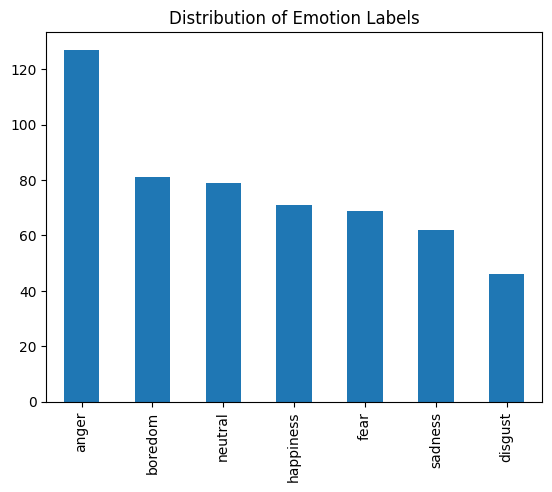

In [7]:
# look at the distribution of the target data
df['label'].value_counts().plot.bar()
plt.savefig('../results/visualizations/distribution_emotion_labels.svg')
plt.title('Distribution of Emotion Labels')
plt.show()

We can see and also know from the description in EmoDB that we have more data of anger whereas the others are slightly balanced. Anyways, we will be using macro-averaged metric calculation which means that we should not have any problem for evaluating the models. 

In [8]:
# look at the statistics of the features for general information
df.describe()

,duration,mean,median,max,min,var,std,speaking_rate,articulation_rate,asd,f1_median,f1_max,f1_mean,f1_std,f1_var,f2_median,f2_max,f2_mean,f2_std,f2_var,f3_median,f3_max,f3_mean,f3_std,f3_var,f4_median,f4_max,f4_mean,f4_std,f4_var,zcr_max,zcr_min,zcr_mean,zcr_median,zcr_var,energy_max,energy_mean,energy_median,energy_var,energy_avg_change_rate_max,energy_avg_change_rate_min,energy_avg_change_rate_mean,energy_avg_change_rate_median,energy_avg_change_rate_var,duration_rising_energy_max,duration_rising_energy_min,duration_rising_energy_mean,duration_rising_energy_median,duration_rising_energy_var,duration_falling_energy_max,duration_falling_energy_min,duration_falling_energy_mean,duration_falling_energy_median,duration_falling_energy_var,value_rising_energy_max,value_rising_energy_min,value_rising_energy_mean,value_rising_energy_median,value_rising_energy_var,value_falling_energy_max,value_falling_energy_min,value_falling_energy_mean,value_falling_energy_median,value_falling_energy_var,rms_max,rms_min,rms_mean,rms_median,rms_var,log_rms_max,log_rms_min,log_rms_mean,log_rms_median,log_rms_var,amplitude_max,amplitude_min,amplitude_mean,amplitude_median,amplitude_var,amplitude_avg_change_rate_max,amplitude_avg_change_rate_min,amplitude_avg_change_rate_mean,amplitude_avg_change_rate_var,lpc_global_max,lpc_global_min,lpc_global_mean,lpc_global_median,lpc_global_var,lpc_local1_max,lpc_local1_min,lpc_local1_mean,lpc_local1_median,lpc_local1_var,lpc_local2_max,lpc_local2_min,lpc_local2_mean,lpc_local2_median,lpc_local2_var,lpc_local3_max,lpc_local3_min,lpc_local3_mean,lpc_local3_median,lpc_local3_var,lpc_local4_max,lpc_local4_min,lpc_local4_mean,lpc_local4_median,lpc_local4_var,spectral_entropy_max,spectral_entropy_min,spectral_entropy_mean,spectral_entropy_median,spectral_entropy_var,shannon_entropy_max,shannon_entropy_mean,shannon_entropy_median,shannon_entropy_var,threshold_entropy_max,threshold_entropy_min,threshold_entropy_mean,threshold_entropy_median,threshold_entropy_var,log_energy_entropy_max,log_energy_entropy_mean,log_energy_entropy_median,log_energy_entropy_var,sure_entropy_max,sure_entropy_mean,sure_entropy_median,sure_entropy_var,f0_max,f0_mean,f0_median,f0_var,voiced_mean,voiced_median,voiced_var,f0_avg_change_rate_max,f0_avg_change_rate_min,f0_avg_change_rate_mean,f0_avg_change_rate_median,f0_avg_change_rate_var,pitch_max,pitch_mean,pitch_median,pitch_var,pitch_time_max,pitch_time_min,pitch_time_mean,pitch_time_median,pitch_time_var,duration_rising_pitch_max,duration_rising_pitch_min,duration_rising_pitch_mean,duration_rising_pitch_median,duration_rising_pitch_var,duration_falling_pitch_max,duration_falling_pitch_min,duration_falling_pitch_mean,duration_falling_pitch_median,duration_falling_pitch_var,value_rising_pitch_max,value_rising_pitch_min,value_rising_pitch_mean,value_rising_pitch_median,value_rising_pitch_var,value_falling_pitch_max,value_falling_pitch_min,value_falling_pitch_mean,value_falling_pitch_median,value_falling_pitch_var,spectral_centroid_max,spectral_centroid_mean,spectral_centroid_median,spectral_centroid_var,mfccs0_max,mfccs0_min,mfccs0_mean,mfccs0_median,mfccs0_var,mfccs1_max,mfccs1_min,mfccs1_mean,mfccs1_median,mfccs1_var,mfccs2_max,mfccs2_min,mfccs2_mean,mfccs2_median,mfccs2_var,mfccs3_max,mfccs3_min,mfccs3_mean,mfccs3_median,mfccs3_var,mfccs4_max,mfccs4_min,mfccs4_mean,mfccs4_median,mfccs4_var,mfccs5_max,mfccs5_min,mfccs5_mean,mfccs5_median,mfccs5_var,mfccs6_max,mfccs6_min,mfccs6_mean,mfccs6_median,mfccs6_var,mfccs7_max,mfccs7_min,mfccs7_mean,mfccs7_median,mfccs7_var,mfccs8_max,mfccs8_min,mfccs8_mean,mfccs8_median,mfccs8_var,mfccs9_max,mfccs9_min,mfccs9_mean,mfccs9_median,mfccs9_var,mfccs10_max,mfccs10_min,mfccs10_mean,mfccs10_median,mfccs10_var,mfccs11_max,mfccs11_min,mfccs11_mean,mfccs11_median,mfccs11_var,mfccs12_max,mfccs12_min,mfccs12_mean,mfccs12_median,mfccs12_var,delta_mfccs0_max,delta_mfccs0_min,delta_mfccs0_mean,delta_mfccs0_median,delta_mfccs0_var,delta_mfccs1_max,delta_mfccs1_min,delta_

In [9]:
# drop unnecessary original information
df.drop(columns=['file', 'speaker', 'gender'], inplace=True)

In [10]:
emo_feat = df.columns.to_list()

In [11]:
# choose only numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
label = df['label']
df = df.select_dtypes(include=numerics)
df = pd.concat([df, label], axis=1)

In [12]:
#df.to_pickle('../results/df_prep_numerical_only.pkl')
df.to_pickle('../results/df_prep_numerical_only_all_stats.pkl')

# 2) Data Selection & Preprocessing
Choose only features that include single numerical values. Lists or numpy arrays are too complex for these simple models.
We implemented own functions for train-test-split and preprocessing in our "Functions" notebook. The data is usually split into train and test, and StandardScaler is applied for numerical values, and LabelEncoder for the target.

In [13]:
X_train, X_test, y_train, y_test = load_train_test_data(df)

A snippet of the data:


,duration,mean,median,max,min,var,std,speaking_rate,articulation_rate,asd,f1_median,f1_max,f1_mean,f1_std,f1_var,f2_median,f2_max,f2_mean,f2_std,f2_var,f3_median,f3_max,f3_mean,f3_std,f3_var,f4_median,f4_max,f4_mean,f4_std,f4_var,zcr_max,zcr_min,zcr_mean,zcr_median,zcr_var,energy_max,energy_mean,energy_median,energy_var,energy_avg_change_rate_max,energy_avg_change_rate_min,energy_avg_change_rate_mean,energy_avg_change_rate_median,energy_avg_change_rate_var,duration_rising_energy_max,duration_rising_energy_min,duration_rising_energy_mean,duration_rising_energy_median,duration_rising_energy_var,duration_falling_energy_max,duration_falling_energy_min,duration_falling_energy_mean,duration_falling_energy_median,duration_falling_energy_var,value_rising_energy_max,value_rising_energy_min,value_rising_energy_mean,value_rising_energy_median,value_rising_energy_var,value_falling_energy_max,value_falling_energy_min,value_falling_energy_mean,value_falling_energy_median,value_falling_energy_var,rms_max,rms_min,rms_mean,rms_median,rms_var,log_rms_max,log_rms_min,log_rms_mean,log_rms_median,log_rms_var,amplitude_max,amplitude_min,amplitude_mean,amplitude_median,amplitude_var,amplitude_avg_change_rate_max,amplitude_avg_change_rate_min,amplitude_avg_change_rate_mean,amplitude_avg_change_rate_var,lpc_global_max,lpc_global_min,lpc_global_mean,lpc_global_median,lpc_global_var,lpc_local1_max,lpc_local1_min,lpc_local1_mean,lpc_local1_median,lpc_local1_var,lpc_local2_max,lpc_local2_min,lpc_local2_mean,lpc_local2_median,lpc_local2_var,lpc_local3_max,lpc_local3_min,lpc_local3_mean,lpc_local3_median,lpc_local3_var,lpc_local4_max,lpc_local4_min,lpc_local4_mean,lpc_local4_median,lpc_local4_var,spectral_entropy_max,spectral_entropy_min,spectral_entropy_mean,spectral_entropy_median,spectral_entropy_var,shannon_entropy_max,shannon_entropy_mean,shannon_entropy_median,shannon_entropy_var,threshold_entropy_max,threshold_entropy_min,threshold_entropy_mean,threshold_entropy_median,threshold_entropy_var,log_energy_entropy_max,log_energy_entropy_mean,log_energy_entropy_median,log_energy_entropy_var,sure_entropy_max,sure_entropy_mean,sure_entropy_median,sure_entropy_var,f0_max,f0_mean,f0_median,f0_var,voiced_mean,voiced_median,voiced_var,f0_avg_change_rate_max,f0_avg_change_rate_min,f0_avg_change_rate_mean,f0_avg_change_rate_median,f0_avg_change_rate_var,pitch_max,pitch_mean,pitch_median,pitch_var,pitch_time_max,pitch_time_min,pitch_time_mean,pitch_time_median,pitch_time_var,duration_rising_pitch_max,duration_rising_pitch_min,duration_rising_pitch_mean,duration_rising_pitch_median,duration_rising_pitch_var,duration_falling_pitch_max,duration_falling_pitch_min,duration_falling_pitch_mean,duration_falling_pitch_median,duration_falling_pitch_var,value_rising_pitch_max,value_rising_pitch_min,value_rising_pitch_mean,value_rising_pitch_median,value_rising_pitch_var,value_falling_pitch_max,value_falling_pitch_min,value_falling_pitch_mean,value_falling_pitch_median,value_falling_pitch_var,spectral_centroid_max,spectral_centroid_mean,spectral_centroid_median,spectral_centroid_var,mfccs0_max,mfccs0_min,mfccs0_mean,mfccs0_median,mfccs0_var,mfccs1_max,mfccs1_min,mfccs1_mean,mfccs1_median,mfccs1_var,mfccs2_max,mfccs2_min,mfccs2_mean,mfccs2_median,mfccs2_var,mfccs3_max,mfccs3_min,mfccs3_mean,mfccs3_median,mfccs3_var,mfccs4_max,mfccs4_min,mfccs4_mean,mfccs4_median,mfccs4_var,mfccs5_max,mfccs5_min,mfccs5_mean,mfccs5_median,mfccs5_var,mfccs6_max,mfccs6_min,mfccs6_mean,mfccs6_median,mfccs6_var,mfccs7_max,mfccs7_min,mfccs7_mean,mfccs7_median,mfccs7_var,mfccs8_max,mfccs8_min,mfccs8_mean,mfccs8_median,mfccs8_var,mfccs9_max,mfccs9_min,mfccs9_mean,mfccs9_median,mfccs9_var,mfccs10_max,mfccs10_min,mfccs10_mean,mfccs10_median,mfccs10_var,mfccs11_max,mfccs11_min,mfccs11_mean,mfccs11_median,mfccs11_var,mfccs12_max,mfccs12_min,mfccs12_mean,mfccs12_median,mfccs12_var,delta_mfccs0_max,delta_mfccs0_min,delta_mfccs0_mean,delta_mfccs0_median,delta_mfccs0_var,delta_mfccs1_max,delta_mfccs1_min,delta_

There are 374 entries with 595 columns in the training data.
There are 161 entries with 595 columns in the testing data.


In [14]:
pd.set_option('display.max_columns', 9)
X_train

,duration,mean,median,max,...,value_falling_pitch_iqr,skew_log_pitch,range_log_pitch,range_log_energy
383,0.175378,-0.186500,-0.060782,0.760068,...,1.182838,-0.618316,0.819217,0.128217
180,0.948485,1.189497,1.839504,-1.321738,...,-0.929710,5.249191,1.722070,-0.027147
447,-0.145150,1.643207,2.452500,-2.032401,...,-0.690254,3.409838,1.820974,-18.587455
409,-1.114666,-1.065435,-0.943173,0.760068,...,1.105247,0.326424,1.693165,0.125971
268,0.026013,-0.699706,-0.652807,0.760068,...,0.287426,-1.108382,0.143329,0.128649
...,...,...,...,...,...,...,...,...,...
214,-0.729475,-0.025622,0.318307,0.090151,...,-0.763865,-0.000975,-0.727133,-0.234529
459,-0.731594,-0.177637,0.202161,0.609279,...,0.755345,0.759944,1.700014,-0.373878
17,0.698008,-0.199254,-0.381798,-1.654394,...,-0.877970,4.197712,1.775527,0.094172
90,1.693861,1.738684,1.474933,-0.686123,...,-0.633489,0.168071,-0.736561,0.120872


# 3) Female Male Differentiation
We apply the same preprocessing procedure for the extracted features with a female-male differentiation in the formant analysis.

In [15]:
# load the data
df = pd.read_pickle('../results/female_male_differentiation/extracted_features_modified_all_stats.pkl')
df.columns.to_list()

['file',
 'label',
 'speaker',
 'gender',
 'duration',
 'mean',
 'median',
 'max',
 'min',
 'var',
 'std',
 'zcr',
 'energy',
 'energy_avg_change_rate',
 'duration_rising_energy',
 'duration_falling_energy',
 'value_rising_energy',
 'value_falling_energy',
 'rms',
 'log_rms',
 'amplitude',
 'amplitude_avg_change_rate',
 'lpc_global',
 'lpc_local',
 'spectral_entropy',
 'shannon_entropy',
 'threshold_entropy',
 'log_energy_entropy',
 'sure_entropy',
 'f0',
 'voiced',
 'f0_avg_change_rate',
 'pitch',
 'pitch_time',
 'duration_rising_pitch',
 'duration_falling_pitch',
 'value_rising_pitch',
 'value_falling_pitch',
 'speaking_rate',
 'articulation_rate',
 'asd',
 'spectral_centroid',
 'mfccs',
 'delta_mfccs',
 'delta2_mfccs',
 'lpccs_local',
 'lpccs_global',
 'lpcmfccs_global',
 'lpcmfccs_local',
 'lfccs',
 'f1',
 'f1_median',
 'f1_max',
 'f1_mean',
 'f1_std',
 'f1_var',
 'f1_avg_change_rate',
 'f2',
 'f2_median',
 'f2_max',
 'f2_mean',
 'f2_std',
 'f2_var',
 'f2_avg_change_rate',
 'f3',
 

In [16]:
# print main information about data
print("There are {} entries with {} columns including the target variable 'label'.".format(df.shape[0], df.shape[1]))

There are 535 entries with 645 columns including the target variable 'label'.


In [17]:
# check for missing values
display(df.isnull().sum())
print("There are {} missing values.".format(df.isnull().sum().sum()))

file                       0
label                      0
speaker                    0
gender                     0
duration                   0
                          ..
value_rising_pitch_iqr     0
value_falling_pitch_iqr    0
skew_log_pitch             0
range_log_pitch            0
range_log_energy           0
Length: 645, dtype: int64

There are 0 missing values.


In [18]:
# drop unnecessary original information
df.drop(columns=['file', 'speaker', 'gender'], inplace=True)

In [19]:
# choose only numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
label = df['label']
df = df.select_dtypes(include=numerics)
df = pd.concat([df, label], axis=1)

In [20]:
df.to_pickle('../results/female_male_differentiation/df_prep_numerical_only_all_stats.pkl')

# 4) RAVDESS dataset
### Preprocessing Ravdess only

In [21]:
# load the data
df = pd.read_pickle('../results/extracted_features_modified_all_stats_ravdess.pkl')

# drop unnecessary original information
df.drop(columns=['file', 'speaker', 'gender'], inplace=True)

df.columns.to_list()

['label',
 'duration',
 'mean',
 'median',
 'max',
 'min',
 'var',
 'std',
 'zcr',
 'energy',
 'energy_avg_change_rate',
 'duration_rising_energy',
 'duration_falling_energy',
 'value_rising_energy',
 'value_falling_energy',
 'rms',
 'log_rms',
 'amplitude',
 'amplitude_avg_change_rate',
 'lpc_global',
 'lpc_local',
 'spectral_entropy',
 'shannon_entropy',
 'threshold_entropy',
 'log_energy_entropy',
 'sure_entropy',
 'f0',
 'voiced',
 'f0_avg_change_rate',
 'pitch',
 'pitch_time',
 'duration_rising_pitch',
 'duration_falling_pitch',
 'value_rising_pitch',
 'value_falling_pitch',
 'speaking_rate',
 'articulation_rate',
 'asd',
 'spectral_centroid',
 'mfccs',
 'delta_mfccs',
 'delta2_mfccs',
 'lpccs_local',
 'lpccs_global',
 'lpcmfccs_global',
 'lpcmfccs_local',
 'lfccs',
 'f1',
 'f1_median',
 'f1_max',
 'f1_mean',
 'f1_std',
 'f1_var',
 'f1_avg_change_rate',
 'f2',
 'f2_median',
 'f2_max',
 'f2_mean',
 'f2_std',
 'f2_var',
 'f2_avg_change_rate',
 'f3',
 'f3_median',
 'f3_max',
 'f3_mea

In [22]:
# print main information about data
print("There are {} entries with {} columns including the target variable 'label'.".format(df.shape[0], df.shape[1]))

There are 1056 entries with 639 columns including the target variable 'label'.


In [23]:
# check for missing values
display(df.isnull().sum())
print("There are {} missing values.".format(df.isnull().sum().sum()))

label                      0
duration                   0
mean                       0
median                     0
max                        0
                          ..
value_rising_pitch_iqr     0
value_falling_pitch_iqr    0
skew_log_pitch             0
range_log_pitch            0
range_log_energy           0
Length: 639, dtype: int64

There are 0 missing values.


In [24]:
# save the features of ravdess in a variable in order to compare later for concatenation with other datasets 
# (unuseful features are being removed while feature extraction & modification which is dataset specific)
ravdess_feat = df.columns.to_list()

In [25]:
np.unique(df['label'], return_inverse=True)[0]

array(['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness'],
      dtype=object)

In [26]:
# choose only numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
label = df['label']
df = df.select_dtypes(include=numerics)
df = pd.concat([df, label], axis=1)

In [27]:
df

,duration,mean,median,max,...,skew_log_pitch,range_log_pitch,range_log_energy,label
0,3.303292,0.001663,0.000000,0.040588,...,0.200736,77.048818,1.0,neutral
1,3.336667,0.001771,0.000000,0.048157,...,-0.305696,79.123729,1.0,neutral
2,3.269917,0.002135,0.000000,0.058472,...,0.080000,59.947620,1.0,neutral
3,3.169833,0.001995,0.000031,0.062683,...,-0.077469,61.569053,1.0,neutral
4,3.470146,0.003189,0.000031,0.058502,...,-1.142175,95.378343,1.0,happiness
...,...,...,...,...,...,...,...,...,...
1051,4.070729,0.005253,0.000305,0.137695,...,0.070366,524.488913,1.0,disgust
1052,4.337667,0.002001,0.000122,0.048706,...,-0.210378,519.081763,1.0,disgust
1053,4.637958,0.008918,0.001190,0.171173,...,0.581562,249.961583,1.0,disgust
1054,4.237563,0.010157,0.000793,0.216003,...,1.244935,395.689686,1.0,disgust


Since there are really huge numbers in some features, we get some inf values after feature scaling. The models are not able to work with these. Moreover, models face issues where there is a huge standard deviation in a feature, i.e. std = inf. We therefore want to remove all features that may face issues with large values from the feature set. We therefore split our data with our usual 70-30 split, preprocess it based on the training set, and check which features should be removed for further processing the data set.

In [28]:
# load train/test data
X_train, X_test, y_train, y_test = load_train_test_data(df, test_size=0.3)

A snippet of the data:


,duration,mean,median,max,...,value_falling_pitch_iqr,skew_log_pitch,range_log_pitch,range_log_energy
9,-0.255829,-0.303249,-0.369229,-0.172753,...,-0.300288,0.904656,1.208619,0.204575
570,-0.947542,-0.709941,-0.497808,-0.729409,...,-0.567481,2.345081,1.911692,0.009503
605,-0.947542,1.187873,0.016507,1.403244,...,2.343895,-0.544311,0.542793,0.204575
891,0.238260,0.703259,-0.272795,0.228675,...,0.954938,1.040288,2.138874,0.204575
506,0.040699,-0.535262,-0.465663,-0.638306,...,-0.302394,0.224038,-0.704603,0.009503


There are 739 entries with 592 columns in the training data.
There are 317 entries with 592 columns in the testing data.


In [29]:
# find the features that are not useful anymore
nans = np.where(X_train.isnull())
nan_cols = list(set(list(nans[1])))

# find the feature names with the indices
cols = X_train.columns.to_list()
nan_col_names = [cols[i] for i in nan_cols]
nan_col_names

['lpcmfccs_local8_var',
 'lpcmfccs_local2_var',
 'lpccs_local10_var',
 'lpcmfccs_local9_var',
 'lpcmfccs_local3_var',
 'lpccs_local11_var',
 'lpcmfccs_local10_var',
 'lpcmfccs_local4_var',
 'lpcmfccs_local11_var',
 'lpcmfccs_local5_var',
 'lpcmfccs_local6_var',
 'lpcmfccs_local0_var',
 'lpcmfccs_local7_var',
 'lpcmfccs_local1_var']

In [30]:
df_desc = X_train.describe()
df_desc

,duration,mean,median,max,...,value_falling_pitch_iqr,skew_log_pitch,range_log_pitch,range_log_energy
count,7.390000e+02,7.390000e+02,7.390000e+02,7.390000e+02,...,739.000000,7.390000e+02,7.390000e+02,7.390000e+02
mean,3.004663e-16,9.614922e-18,1.442238e-17,7.691938e-17,...,0.000000,1.322052e-17,-1.298014e-16,7.916010e-11
std,1.000677e+00,1.000677e+00,1.000677e+00,1.000677e+00,...,1.000677,1.000677e+00,1.000677e+00,1.000677e+00
min,-1.935720e+00,-8.330081e-01,-5.620975e-01,-8.610465e-01,...,-0.971305,-3.049546e+00,-1.418273e+00,-1.735190e+01
25%,-6.510758e-01,-6.163554e-01,-4.978081e-01,-6.499056e-01,...,-0.604723,-4.872226e-01,-8.223409e-01,9.502829e-03
50%,-1.569865e-01,-3.818923e-01,-3.692292e-01,-3.928872e-01,...,-0.333979,-1.017678e-02,-2.644293e-01,2.045748e-01
75%,5.347262e-01,1.945600e-01,-4.778210e-02,1.893143e-01,...,0.236173,4.516751e-01,6.673425e-01,2.045748e-01
max,4.586283e+00,5.478787e+00,5.995424e+00,3.384710e+00,...,8.477466,4.693787e+00,2.208708e+00,5.947187e-01


In [31]:
df_desc_nans = list(np.where(df_desc.loc['std'] == np.inf)[0])
cols = X_train.columns.to_list()
nan_col_names.extend([cols[i] for i in df_desc_nans])
nan_col_names

['lpcmfccs_local8_var',
 'lpcmfccs_local2_var',
 'lpccs_local10_var',
 'lpcmfccs_local9_var',
 'lpcmfccs_local3_var',
 'lpccs_local11_var',
 'lpcmfccs_local10_var',
 'lpcmfccs_local4_var',
 'lpcmfccs_local11_var',
 'lpcmfccs_local5_var',
 'lpcmfccs_local6_var',
 'lpcmfccs_local0_var',
 'lpcmfccs_local7_var',
 'lpcmfccs_local1_var',
 'lpccs_local9_var']

In [32]:
# drop these features and save the dataframe
df.drop(columns = nan_col_names, inplace=True)

In [33]:
# check for missing values
print("There are {} missing values.".format(df.isnull().sum().sum()))

There are 0 missing values.


In [34]:
# save the dataframe
df.to_pickle('../results/df_prep_numerical_only_all_stats_ravdess.pkl')

### Preprocessing EmoDB + Ravdess

Since we are removing features that contain only the same value during the modified extraction of features, not all of the features are the same. Nevertheless, when we concatenate the datasets, we only work with overlapping features. Hence, we have to create an overlapping feature set.

In [35]:
def missing_cols(features1, features2):
    missing_1 = list(set(features2) - set(features1))
    missing_2 = list(set(features1) - set(features2))
    return missing_1 + missing_2

In [36]:
missing_emo_rav = missing_cols(emo_feat, ravdess_feat)
missing_emo_rav

['threshold_entropy_min', 'f0_avg_change_rate_median', 'pitch_median']

In [37]:
# load the data
df_emodb = pd.read_pickle('../results/extracted_features_modified_all_stats.pkl')
df_ravdess = pd.read_pickle('../results/extracted_features_modified_all_stats_ravdess.pkl')

# concatenate both datasets
df = pd.concat([df_emodb, df_ravdess], axis=0)
df.drop(columns = missing_emo_rav, inplace=True)
df = df.reset_index(drop=True)

# drop unnecessary original information
df.drop(columns=['file', 'speaker', 'gender'], inplace=True)

In [38]:
# print main information about data
print("There are {} entries with {} columns including the target variable 'label'.".format(df.shape[0], df.shape[1]))

There are 1591 entries with 639 columns including the target variable 'label'.


In [39]:
# choose only numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
label = df['label']
df = df.select_dtypes(include=numerics)
df = pd.concat([df, label], axis=1)

Also here we have to check for possible nan and inf values after feature scaling since it might be that the numbers were to big. 

In [40]:
# load train/test data
X_train, X_test, y_train, y_test = load_train_test_data(df, test_size=0.3)

A snippet of the data:


,duration,mean,median,max,...,value_falling_pitch_iqr,skew_log_pitch,range_log_pitch,range_log_energy
929,0.212322,-0.836873,-0.638089,-0.942371,...,-0.756799,0.392177,-1.290843,0.074398
332,-1.249955,0.955900,0.791797,1.413920,...,-0.150079,-1.138816,0.391724,0.065663
590,0.587436,-0.619750,-0.632217,-0.435310,...,0.239189,0.483067,0.006585,0.074447
1057,0.254013,-0.808465,-0.638089,-0.970944,...,-0.282260,0.734724,-0.733525,0.074447
1272,0.420724,-0.233301,-0.494220,0.414944,...,0.485608,-0.139548,-0.264126,0.074447


There are 1113 entries with 592 columns in the training data.
There are 478 entries with 592 columns in the testing data.


In [41]:
# find the features that are not useful anymore
nans = np.where(X_train.isnull())
nan_cols = list(set(list(nans[1])))

# find the feature names with the indices
cols = X_train.columns.to_list()
nan_col_names = [cols[i] for i in nan_cols]
nan_col_names

[]

In [42]:
df_desc = X_train.describe()
df_desc_nans = list(np.where(df_desc.loc['std'] == np.inf)[0])
cols = X_train.columns.to_list()
nan_col_names.extend([cols[i] for i in df_desc_nans])
nan_col_names

['lpccs_local11_var',
 'lpcmfccs_local5_var',
 'lpcmfccs_local6_var',
 'lpcmfccs_local7_var',
 'lpcmfccs_local8_var',
 'lpcmfccs_local9_var',
 'lpcmfccs_local10_var',
 'lpcmfccs_local11_var']

In [43]:
# drop these features and save the dataframe
df.drop(columns = nan_col_names, inplace=True)

In [44]:
# check for missing values
print("There are {} missing values.".format(df.isnull().sum().sum()))

There are 0 missing values.


In [45]:
df.to_pickle('../results/df_prep_numerical_only_all_stats_emodb_ravdess.pkl')

# 5) IEMOCAP dataset
### Preprocessing Iemocap only

In [46]:
# load the data
df = pd.read_pickle('../results/extracted_features_modified_all_stats_iemocap.pkl')

# drop unnecessary original information
df.drop(columns=['file', 'speaker', 'gender'], inplace=True)

In [47]:
df['label'].unique()

array(['neutral', 'anger', 'happiness', 'sadness', 'fear', 'disgust'],
      dtype=object)

In [48]:
df.groupby('label').count()

,duration,mean,median,max,...,value_falling_pitch_iqr,skew_log_pitch,range_log_pitch,range_log_energy
label,,,,,,,,,
anger,814,814,814,814,...,814,814,814,814
disgust,1,1,1,1,...,1,1,1,1
fear,32,32,32,32,...,31,31,31,32
happiness,311,311,311,311,...,309,309,309,311
neutral,609,609,609,609,...,607,607,607,609
sadness,476,476,476,476,...,476,476,476,476


In [49]:
# since the label 'disgust' is only once in our extracted feature set, we will remove this label as well 
# (it not enough for creating a training and testing set)
idx_disgust = df[df['label'] == 'disgust'].index[0]
idx_disgust

196

In [50]:
df.drop(index = [idx_disgust], inplace=True)
df = df.reset_index(drop=True)

In [51]:
# print main information about data
print("There are {} entries with {} columns including the target variable 'label'.".format(df.shape[0], df.shape[1]))

There are 2242 entries with 641 columns including the target variable 'label'.


In [52]:
# save the iemocap features
iemocap_feat = df.columns.to_list()

In [53]:
# check for missing values
display(df.isnull().sum())
print("There are {} missing values.".format(df.isnull().sum().sum()))

label                      0
duration                   0
mean                       0
median                     0
max                        0
                          ..
value_rising_pitch_iqr     5
value_falling_pitch_iqr    5
skew_log_pitch             5
range_log_pitch            5
range_log_energy           0
Length: 641, dtype: int64

There are 365 missing values.


In [54]:
df.dropna(inplace=True)
df = df.reset_index(drop=True)
df.shape

(2237, 641)

We had to drop a few audios which contain unuseful information / where it was not easy to extract all the features.

In [55]:
# empty lists?
contains_empty_list = any((type(x) == list or type(x) == np.ndarray) and len(x) == 0 for x in df.values.flatten())
contains_empty_list

False

In [56]:
np.unique(df['label'], return_inverse=True)[0]

array(['anger', 'fear', 'happiness', 'neutral', 'sadness'], dtype=object)

Check again for missing values after feature scaling.

In [57]:
# load train/test data
X_train, X_test, y_train, y_test = load_train_test_data(df, test_size=0.3)

A snippet of the data:


,duration,mean,median,max,...,value_falling_pitch_iqr,skew_log_pitch,range_log_pitch,range_log_energy
735,1.993765,4.043412,4.084223,3.091839,...,0.358626,-0.648948,1.573889,0.367046
1247,-0.043098,-0.547272,-0.427309,-0.817174,...,-0.661467,4.179633,1.120107,-1.959122
1362,-0.710263,-0.483259,-0.401327,-0.587626,...,1.028507,0.393781,1.133454,-0.116341
1759,0.673904,-0.490176,-0.387154,-0.640857,...,-0.393884,2.112090,1.536584,0.353917
759,-0.399727,-0.320319,-0.191103,-0.714684,...,-0.469991,-1.488210,-0.424084,0.050570


There are 1565 entries with 594 columns in the training data.
There are 672 entries with 594 columns in the testing data.


In [58]:
# check for missing values
print("There are {} missing values.".format(X_train.isnull().sum().sum()))

There are 0 missing values.


In [59]:
df.to_pickle('../results/df_prep_numerical_only_all_stats_iemocap.pkl')

### Preprocessing EmoDB + Iemocap

In [60]:
missing_emo_iemo = missing_cols(emo_feat, iemocap_feat)
missing_emo_iemo

['amplitude_avg_change_rate_median', 'sure_entropy_max', 'sure_entropy_median']

In [61]:
# load the data
df_emodb = pd.read_pickle('../results/extracted_features_modified_all_stats.pkl')
df_iemocap = pd.read_pickle('../results/extracted_features_modified_all_stats_iemocap.pkl')

# concatenate both datasets
df = pd.concat([df_emodb, df_iemocap], axis=0)
df.drop(columns = missing_emo_iemo, inplace=True)
df = df.reset_index(drop=True)

# drop unnecessary original information
df.drop(columns=['file', 'speaker', 'gender'], inplace=True)

In [62]:
# get the feature set of emodb + iemocap
emo_iemo_feat = df.columns.to_list()

In [63]:
# print main information about data
print("There are {} entries with {} columns including the target variable 'label'.".format(df.shape[0], df.shape[1]))

There are 2778 entries with 640 columns including the target variable 'label'.


In [64]:
# check for missing values
print("There are {} missing values.".format(df.isnull().sum().sum()))

There are 365 missing values.


In [65]:
df.dropna(inplace=True)
df = df.reset_index(drop=True)
df.shape

(2773, 640)

Check for missing values after feature scaling.

In [66]:
# load train/test data
X_train, X_test, y_train, y_test = load_train_test_data(df, test_size=0.3, verbose=False)

In [67]:
# check for missing values
print("There are {} missing values.".format(X_train.isnull().sum().sum()))

There are 0 missing values.


In [68]:
df.to_pickle('../results/df_prep_numerical_only_all_stats_emodb_iemocap.pkl')

### Preprocessing EmoDB + Ravdess + Iemocap

In [69]:
missing_emo_iemo_rav = missing_emo_iemo + missing_emo_rav
missing_emo_iemo_rav

['amplitude_avg_change_rate_median',
 'sure_entropy_max',
 'sure_entropy_median',
 'threshold_entropy_min',
 'f0_avg_change_rate_median',
 'pitch_median']

In [70]:
# load the data
df_emodb = pd.read_pickle('../results/extracted_features_modified_all_stats.pkl')
df_ravdess = pd.read_pickle('../results/extracted_features_modified_all_stats_ravdess.pkl')
df_iemocap = pd.read_pickle('../results/extracted_features_modified_all_stats_iemocap.pkl')

# concatenate both datasets
df = pd.concat([df_emodb, df_ravdess, df_iemocap], axis=0)
df.drop(columns = missing_emo_iemo_rav, inplace=True)
df = df.reset_index(drop=True)

# drop unnecessary original information
df.drop(columns=['file', 'speaker', 'gender'], inplace=True)

In [71]:
# print main information about data
print("There are {} entries with {} columns including the target variable 'label'.".format(df.shape[0], df.shape[1]))

There are 3834 entries with 637 columns including the target variable 'label'.


In [72]:
# check for missing values
print("There are {} missing values.".format(df.isnull().sum().sum()))

There are 365 missing values.


In [73]:
df.dropna(inplace=True)
df = df.reset_index(drop=True)
df.shape

(3829, 637)

Check for missing values after feature scaling.

In [74]:
# load train/test data
X_train, X_test, y_train, y_test = load_train_test_data(df, test_size=0.3, verbose=False)

In [75]:
# check for missing values
print("There are {} missing values.".format(X_train.isnull().sum().sum()))

There are 34840 missing values.


In [76]:
# find the features that are not useful anymore
nans = np.where(X_train.isnull())
nan_cols = list(set(list(nans[1])))

# find the feature names with the indices
cols = X_train.columns.to_list()
nan_col_names = [cols[i] for i in nan_cols]
nan_col_names

['lpcmfccs_local2_var',
 'lpccs_local10_var',
 'lpcmfccs_local9_var',
 'lpcmfccs_local3_var',
 'lpccs_local11_var',
 'lpcmfccs_local4_var',
 'lpcmfccs_local11_var',
 'lpcmfccs_local5_var',
 'lpcmfccs_local6_var',
 'lpcmfccs_local0_var',
 'lpcmfccs_local7_var',
 'lpcmfccs_local1_var',
 'lpcmfccs_local8_var']

In [77]:
df_desc = X_train.describe()
df_desc_nans = list(np.where(df_desc.loc['std'] == np.inf)[0])
cols = X_train.columns.to_list()
nan_col_names.extend([cols[i] for i in df_desc_nans])
nan_col_names

['lpcmfccs_local2_var',
 'lpccs_local10_var',
 'lpcmfccs_local9_var',
 'lpcmfccs_local3_var',
 'lpccs_local11_var',
 'lpcmfccs_local4_var',
 'lpcmfccs_local11_var',
 'lpcmfccs_local5_var',
 'lpcmfccs_local6_var',
 'lpcmfccs_local0_var',
 'lpcmfccs_local7_var',
 'lpcmfccs_local1_var',
 'lpcmfccs_local8_var',
 'lpccs_local9_var',
 'lpcmfccs_local10_var']

In [78]:
# drop these features
df.drop(columns = nan_col_names, inplace=True)

In [79]:
# check for missing values
print("There are {} missing values.".format(df.isnull().sum().sum()))

There are 0 missing values.


In [80]:
df.to_pickle('../results/df_prep_numerical_only_all_stats_emodb_ravdess_iemocap.pkl')